In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import pickle as pkl

In [2]:
from google.colab import drive

In [3]:
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
df = os.path.abspath("/content/drive/MyDrive/CustomerChurn_dataset.csv")

In [5]:
churningcustomer = pd.read_csv(df)

In [6]:
churningcustomer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:

churningcustomer = churningcustomer.drop('customerID', axis=1)


In [8]:
churningcustomer

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
churningcustomer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
churningcustomer['TotalCharges'] = pd.to_numeric(churningcustomer['TotalCharges'], errors='coerce')


In [11]:
print(churningcustomer.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [12]:
imputer = SimpleImputer(strategy='mean')
churningcustomer['TotalCharges'] = imputer.fit_transform(churningcustomer[['TotalCharges']])


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming 'Churn' is your target variable
X = churningcustomer.drop('Churn', axis=1)  # Features
y = churningcustomer['Churn']  # Target variable

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
X_encoded = X.copy()  # Make a copy to avoid modifying the original DataFrame
for col in categorical_cols:
    X_encoded[col] = label_encoder.fit_transform(X[col])



In [14]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to your data
rf_classifier.fit(X_encoded, y)

# Get feature importances from the trained model
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)

# Display the top 5 features by importance
top_features = feature_importances.head(5)
print("Top Features by Importance:")
print(top_features)

Top Features by Importance:
TotalCharges      0.188278
MonthlyCharges    0.181334
tenure            0.158392
Contract          0.079351
PaymentMethod     0.051175
dtype: float64


EDA

In [15]:
top_features = ['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract', 'PaymentMethod']
print(churningcustomer[top_features].describe())


       TotalCharges  MonthlyCharges       tenure
count   7043.000000     7043.000000  7043.000000
mean    2283.300441       64.761692    32.371149
std     2265.000258       30.090047    24.559481
min       18.800000       18.250000     0.000000
25%      402.225000       35.500000     9.000000
50%     1400.550000       70.350000    29.000000
75%     3786.600000       89.850000    55.000000
max     8684.800000      118.750000    72.000000


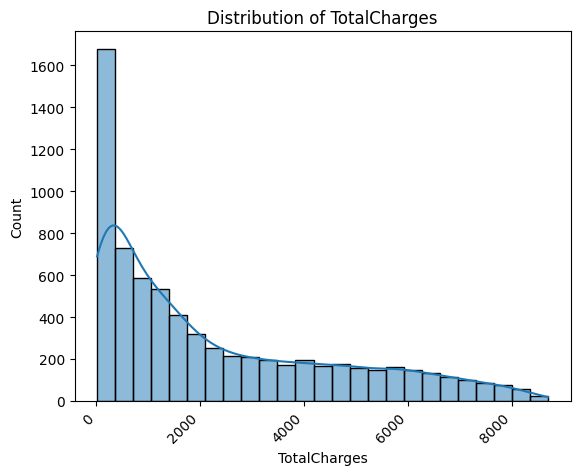

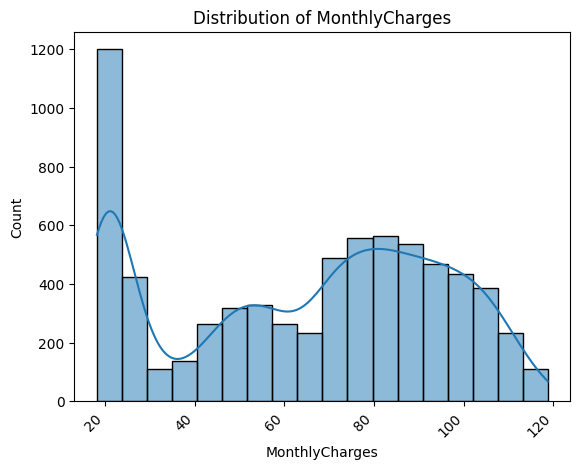

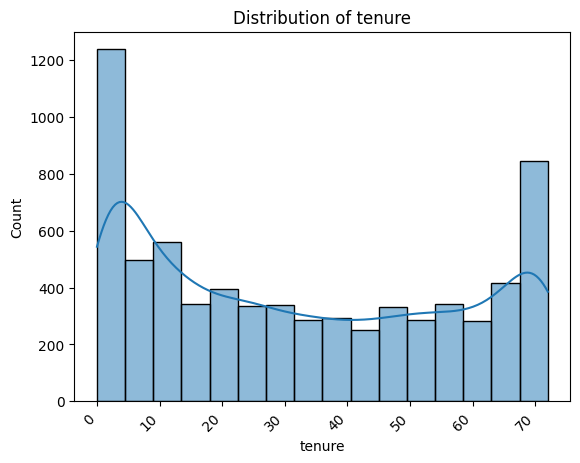

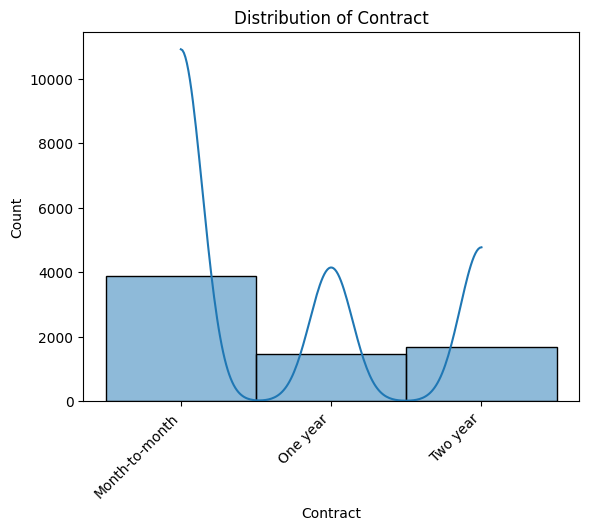

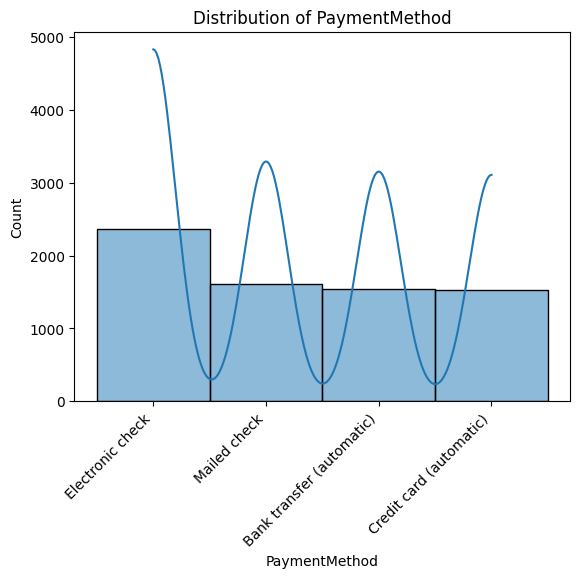

In [16]:
for feature in top_features:
    sns.histplot(churningcustomer[feature], kde=True)
    plt.title(f'Distribution of {feature}')

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')

    plt.show()


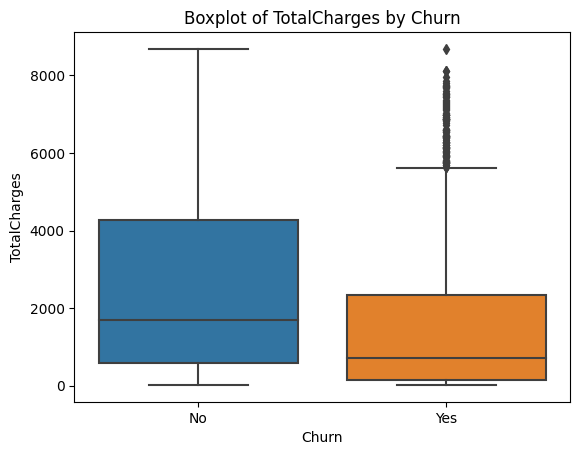

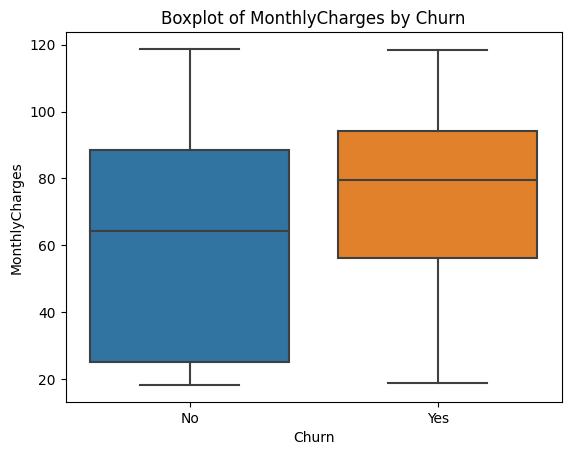

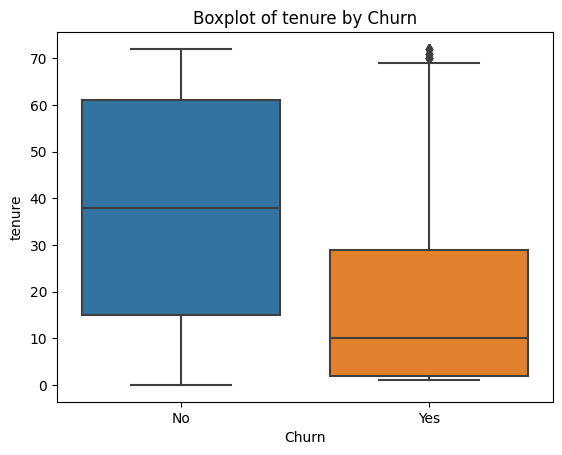

In [17]:
for feature in ['TotalCharges', 'MonthlyCharges', 'tenure']:
    sns.boxplot(x='Churn', y=feature, data=churningcustomer)
    plt.title(f'Boxplot of {feature} by Churn')
    plt.show()


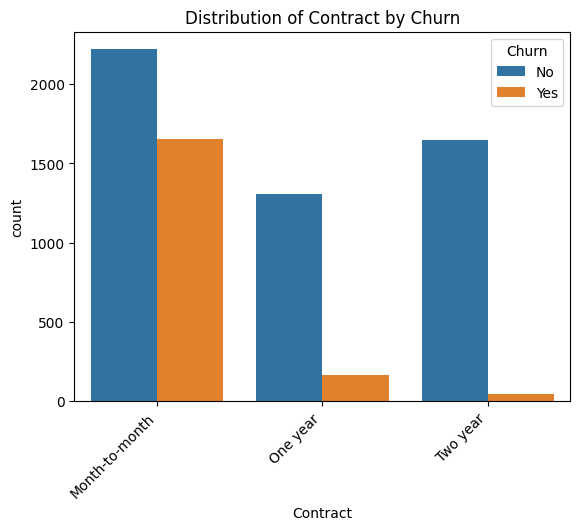

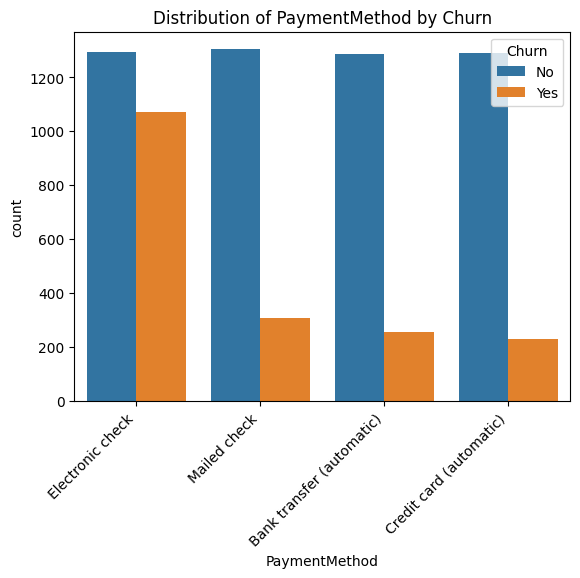

In [18]:
for feature in ['Contract', 'PaymentMethod']:
    sns.countplot(x=feature, hue='Churn', data=churningcustomer)
    plt.title(f'Distribution of {feature} by Churn')

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')

    plt.show()



<ipython-input-19-725f4d1dc92b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_features_matrix = churningcustomer[top_features].corr()


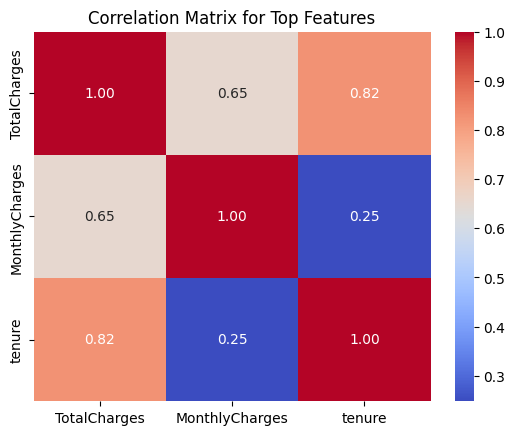

In [19]:
top_features_matrix = churningcustomer[top_features].corr()
sns.heatmap(top_features_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Top Features')
plt.show()


Training Model

In [20]:
# After label encoding
print(X_encoded.dtypes)


gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
dtype: object


In [21]:
df = pd.concat([churningcustomer[top_features], y], axis=1)


In [22]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


In [23]:
df

,TotalCharges,MonthlyCharges,tenure,Contract,PaymentMethod,Churn
0,29.85,29.85,1,0,2,0
1,1889.50,56.95,34,1,3,0
2,108.15,53.85,2,0,3,1
3,1840.75,42.30,45,1,0,0
4,151.65,70.70,2,0,2,1
...,...,...,...,...,...,...
7038,1990.50,84.80,24,1,3,0
7039,7362.90,103.20,72,1,1,0
7040,346.45,29.60,11,0,2,0
7041,306.60,74.40,4,0,3,1


In [24]:
X = df. drop('Churn', axis=1)
y = df['Churn']

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X.copy())


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical


In [28]:
# Keras Functional API model

#Input layer
input_layer = Input(shape=(X_train.shape[1],))

#Hidden layer
hidden_layer_1 = Dense(32, activation='relu')(input_layer)
hidden_layer_2 = Dense(24, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(12, activation='relu')(hidden_layer_2)


#)Outputvlayer
output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

In [29]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=120, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/120
177/177 [==============================] - 2s 4ms/step - loss: 0.6344 - accuracy: 0.6390 - val_loss: 0.5612 - val_accuracy: 0.7175
Epoch 2/120
177/177 [==============================] - 1s 3ms/step - loss: 0.5384 - accuracy: 0.7299 - val_loss: 0.4983 - val_accuracy: 0.7353
Epoch 3/120
177/177 [==============================] - 0s 3ms/step - loss: 0.4964 - accuracy: 0.7528 - val_loss: 0.4662 - val_accuracy: 0.7807
Epoch 4/120
177/177 [==============================] - 0s 3ms/step - loss: 0.4742 - accuracy: 0.7719 - val_loss: 0.4475 - val_accuracy: 0.7835
Epoch 5/120
177/177 [==============================] - 1s 5ms/step - loss: 0.4616 - accuracy: 0.7764 - val_loss: 0.4363 - val_accuracy: 0.7864
Epoch 6/120
177/177 [==============================] - 1s 5ms/step - loss: 0.4540 - accuracy: 0.7771 - val_loss: 0.4293 - val_accuracy: 0.7913
Epoch 7/120
177/177 [==============================] - 1s 5ms/step - loss: 0.4492 - accuracy: 0.7771 - val_loss: 0.4250 - val_accuracy: 0.7913

In [30]:
_, accuracy = model.evaluate(X_train, y_train)
accuracy*100

177/177 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.7946


79.46397066116333

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.4f}')

45/45 [==============================] - 0s 2ms/step - loss: 0.4060 - accuracy: 0.8020
Test Loss: 0.4060
Test Accuracy: 80.1987


In [32]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.1 MB/s eta 0:00:00


In [33]:
import keras_tuner
from tensorflow import keras

In [34]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(X_train.shape[1],)))

    # Tune the number of hidden layers and units
    for i in range(hp.Int('num_hidden_layers', min_value=1, max_value=4)):
        model.add(keras.layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=96, step=32),
                             activation=hp.Choice(f'activation_{i}', values=['relu', 'tanh'])))

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Tune the learning rate
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
        )

    return model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [35]:
build_model(keras_tuner.HyperParameters())

In [36]:
tuner = keras_tuner.Hyperband(
  hypermodel=build_model,
  objective='val_accuracy',
  max_epochs=100,
  factor=3,
  directory='tuning_dir',
  project_name='samples')

In [37]:
tuner.search(X_train, y_train, epochs=30 ,validation_data=(X_test, y_test))

Trial 254 Complete [00h 01m 08s]
val_accuracy: 0.8090844750404358

Best val_accuracy So Far: 0.8140525221824646
Total elapsed time: 00h 40m 51s


In [38]:
tuner.results_summary()

Results summary
Results in tuning_dir/samples
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0208 summary
Hyperparameters:
num_hidden_layers: 4
units_0: 96
activation_0: relu
lr: 0.0009180600809360499
units_1: 64
activation_1: tanh
units_2: 32
activation_2: relu
units_3: 64
activation_3: relu
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0203
Score: 0.8140525221824646

Trial 0252 summary
Hyperparameters:
num_hidden_layers: 4
units_0: 64
activation_0: relu
lr: 0.0008910215978464535
units_1: 64
activation_1: relu
units_2: 64
activation_2: tanh
units_3: 96
activation_3: tanh
tuner/epochs: 100
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.8140525221824646

Trial 0238 summary
Hyperparameters:
num_hidden_layers: 4
units_0: 96
activation_0: relu
lr: 0.0009300260732281189
units_1: 64
activation_1: tanh
units_2: 32
activation_2: relu
units_3: 64
activation_3: tanh
tuner/epochs: 34
tuner/initial_epoch: 0

In [43]:
best_model = tuner.get_best_models(num_models=2)[0]

In [40]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                576       
                                                                 
 dense_1 (Dense)             (None, 64)                6208      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11041 (43.13 KB)
Trainable params: 11041 (43.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
test_accuracy = best_model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {test_accuracy:.4f}")

45/45 [==============================] - 1s 4ms/step - loss: 0.4136 - accuracy: 0.8141
Test Accuracy: 0.8141


In [45]:
#Deployment
best_model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
with open ('sc.pkl','wb') as file:
  pkl.dump(scaler,file)


In [50]:
with open('lbl_encoder.pkl', 'wb') as file:
  pkl.dump(label_encoder,file)